In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_excel('nottingham.xlsx')

In [5]:
df

,RecType,Schoolme,Address1,Address2,Address3,Town,PostCode,TelNum,SchoolType,TotPup,TotElig,AVG_ENG_MATH_SCORE_07,AVG_ENG_MATH_SCORE_08,AVG_ENG_MATH_SCORE_09,AVG_ENG_MATH_SCORE_10,P_ABSENT_PERSIST
0,1,Claremont Primary and Nursery School,Claremont Road,Off Huckll Road,,Nottingham,NG5 1BH,0115 9156870,CY,337,49.0,25.1,26.0,26.2,26.4,11.3
1,1,Windmill Primary & Nursery School,Sneinton Boulevard,,,Nottingham,NG2 4FZ,0115 9150195,CY,442,86.0,24.9,25.2,23.9,24.7,8.6
2,1,Stanstead Nursery and Primary School,Stanstead Avenue,Rise Park,Stanstead Avenue,Nottingham,NG5 5BL,0115 9156300,CY,198,24.0,28.0,25.5,27.1,24.7,7.7
3,1,Nottingham Academy,Sneinton Boulevard,,Sneinton,Nottingham,NG2 4GL,0115 9103200,AC,2170,68.0,NaN,NaN,NaN,NaN,7.6
4,1,Southwark Primary School,Bulwell Lane,Old Basford,,Nottingham,NG6 0BS,0115 9150466,CY,531,69.0,27.1,26.6,27.4,26.8,7.3
5,1,Mellers Primary and Nursery School,Norton Street,Radford,,Nottingham,NG7 3HJ,0115 9151796,CY,247,31.0,23.4,23.4,25.2,NaN,6.7
6,1,Glade Hill Primary School,Chippenham Road,Bestwood Park Estate,,Nottingham,NG5 5TA,0115 9150298,CY,211,26.0,25.0,25.7,26.0,NaN,6.5
7,1,Edale Rise Primary & Nursery School,Edale Road,Sneinton Dale,,Nottingham,NG2 4HT,0115 9150180,CY,177,NaN,NaN,NaN,NaN,NaN,6.3
8,1,Southglade Primary School,Beckhampton Road,Bestwood Park,,Nottingham,NG5 5NE,0115 9153980,CY,340,47.0,NaN,28.9,28.5,27.1,6.1
9,1,Glapton Primary and Nursery School,Glapton Lane,Clifton,,Nottingham,NG11 8EA,0115 9152936,CY,269,39.0,28.3,25.4,26.5,27.2,6.0


In [7]:
# df[df['AVG_ENG_MATH_SCORE_07']<16]
# df[df['P_ABSENT_PERSIST']>8]
# df[df['AVG_ENG_MATH_SCORE_10']==df['AVG_ENG_MATH_SCORE_10'].max()]
# df[['AVG_ENG_MATH_SCORE_07','AVG_ENG_MATH_SCORE_08','AVG_ENG_MATH_SCORE_09','AVG_ENG_MATH_SCORE_10']].var(axis=0)
# df[['AVG_ENG_MATH_SCORE_07','AVG_ENG_MATH_SCORE_08','AVG_ENG_MATH_SCORE_09','AVG_ENG_MATH_SCORE_10']].skew(axis=0)
# df[['AVG_ENG_MATH_SCORE_07','AVG_ENG_MATH_SCORE_08','AVG_ENG_MATH_SCORE_09','AVG_ENG_MATH_SCORE_10']].kurtosis(axis=0)
print(df['P_ABSENT_PERSIST'].corr(df['AVG_ENG_MATH_SCORE_10'],method='pearson'),df['P_ABSENT_PERSIST'].corr(df['AVG_ENG_MATH_SCORE_09'], method='pearson'),df['P_ABSENT_PERSIST'].corr(df['AVG_ENG_MATH_SCORE_08'], method='pearson'),df['P_ABSENT_PERSIST'].corr(df['AVG_ENG_MATH_SCORE_07'], method='pearson'))

-0.494355586892514 -0.520596522565469 -0.5601339107036434 -0.4870708960412004


Text(0.5,1,'AVG_ENG_MATH_SCORE_10')

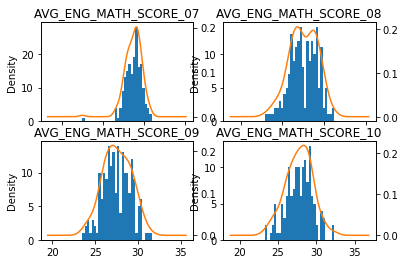

In [65]:
plt.subplot(2, 2, 1)
ax = df['AVG_ENG_MATH_SCORE_07'].hist(bins=30)
df['AVG_ENG_MATH_SCORE_07'].plot(kind='kde', ax=ax, secondary_y=True)
plt.title('AVG_ENG_MATH_SCORE_07')

plt.subplot(2, 2, 2)
ax = df['AVG_ENG_MATH_SCORE_08'].hist(bins=30)
df['AVG_ENG_MATH_SCORE_08'].plot(kind='kde', ax=ax, secondary_y=True)
plt.title('AVG_ENG_MATH_SCORE_08')

plt.subplot(2, 2, 3)
ax = df['AVG_ENG_MATH_SCORE_09'].hist(bins=30)
df['AVG_ENG_MATH_SCORE_09'].plot(kind='kde', ax=ax, secondary_y=True)
plt.title('AVG_ENG_MATH_SCORE_09')

plt.subplot(2, 2, 4)
ax = df['AVG_ENG_MATH_SCORE_10'].hist(bins=30)
df['AVG_ENG_MATH_SCORE_10'].plot(kind='kde', ax=ax, secondary_y=True)
plt.title('AVG_ENG_MATH_SCORE_10')

In [66]:
np.polyfit(df['P_ABSENT_PERSIST'].fillna(0), df['AVG_ENG_MATH_SCORE_09'].fillna(0), 1)

array([ 0.12795693, 24.6566782 ])

In [67]:
na_selector = df['P_ABSENT_PERSIST'].isna()
na_selector |= df['AVG_ENG_MATH_SCORE_07'].isna()
na_selector |= df['AVG_ENG_MATH_SCORE_08'].isna()
na_selector |= df['AVG_ENG_MATH_SCORE_09'].isna()
na_selector |= df['AVG_ENG_MATH_SCORE_10'].isna()
df_cleaned = df[~na_selector]

In [68]:
np.polyfit(df_cleaned['P_ABSENT_PERSIST'].fillna(0), df_cleaned['AVG_ENG_MATH_SCORE_09'].fillna(0), 1)

array([-0.44654826, 28.54239409])

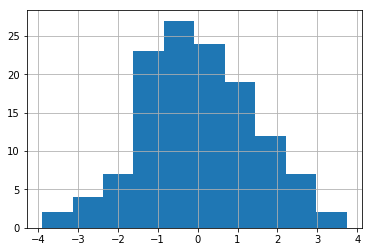

In [69]:
absent = df_cleaned['P_ABSENT_PERSIST']
score_grade09 = df_cleaned['AVG_ENG_MATH_SCORE_09']
estimated_score_grade09 =  28.54239409 + (-0.44654826) * absent
(score_grade09 - estimated_score_grade09).hist()

/Users/chao/venv/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


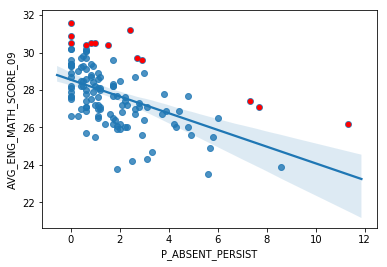

In [70]:
ax = sns.regplot(
    df_cleaned['P_ABSENT_PERSIST'], 
    df_cleaned['AVG_ENG_MATH_SCORE_09'],
)
df_cleaned[s > s.quantile(0.90)].plot(
    x='P_ABSENT_PERSIST', 
    y='AVG_ENG_MATH_SCORE_09', 
    kind='scatter',
    color='red',
    ax=ax)

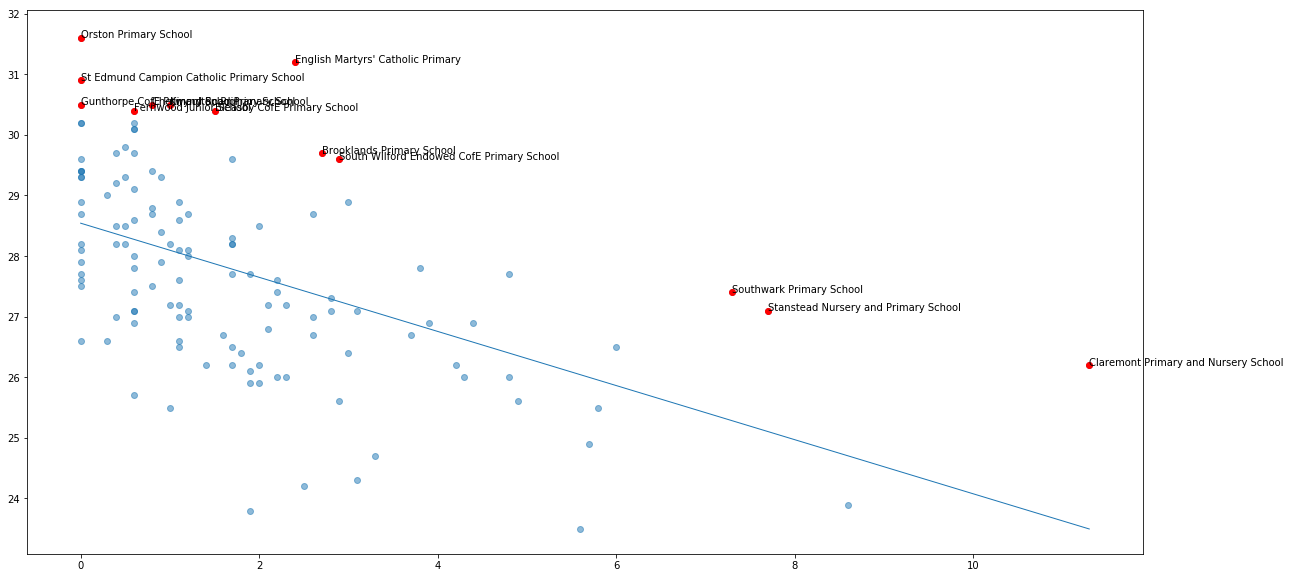

In [71]:
plt.figure(figsize=(20, 10))

# Plot main bubbles

x = df_cleaned['P_ABSENT_PERSIST']
y = df_cleaned['AVG_ENG_MATH_SCORE_09'] 

plt.scatter(x, y, alpha=0.5)

# Fit the curve (a line) and plot trendline

coeffs = np.polyfit(x, y, 1)

trendline_x = np.linspace(x.min(), x.max()) #创建等差数列
trendline_y = coeffs[0] * trendline_x + coeffs[1]
plt.plot(trendline_x, trendline_y, linewidth=1)


estimated_y = coeffs[0] * x + coeffs[1]
s = y - estimated_y

suspicious_x = x[s > s.quantile(0.90)].values
suspicious_y = y[s > s.quantile(0.90)].values
suspicious_t = df_cleaned[s > s.quantile(0.90)]['Schoolme'].values
plt.scatter(
    suspicious_x,
    suspicious_y,
    color='red'
)
for i in range(len(suspicious_t)):
    plt.text(suspicious_x[i], suspicious_y[i], suspicious_t[i])

In [72]:
def discretise(x):
    if x <= 1:
        x = '01_hard_working'
    elif x > 1 and x <= 3:
        x = '02_middle'
    elif x > 3:
        x = '03_happy'
    return x
f = ['mean','max','min','var','std']
df['group'] = df['P_ABSENT_PERSIST'].apply(discretise)
year9_agg = df.groupby('group')['AVG_ENG_MATH_SCORE_09'].agg(f)
year9_agg.sort_values(f,ascending=False)

,mean,max,min,var,std
group,,,,,
01_hard_working,28.582667,31.6,25.5,1.634695,1.278552
02_middle,27.241667,31.2,23.8,2.273451,1.507797
03_happy,26.247500,29.7,23.5,1.644096,1.282223


In [73]:
def discretise_grade(g):
    if g >= 28:
        g = 'A'
    elif g > 26 and g <= 28:
        g = 'B'
    elif g <= 26:
        g = 'C' 
    return g
# discretise all all-year students scores
df['grade_07'] = df['AVG_ENG_MATH_SCORE_07'].apply(discretise_grade)
df['grade_08'] = df['AVG_ENG_MATH_SCORE_08'].apply(discretise_grade)
df['grade_09'] = df['AVG_ENG_MATH_SCORE_09'].apply(discretise_grade)
df['grade_10'] = df['AVG_ENG_MATH_SCORE_10'].apply(discretise_grade)
df.pivot_table(index=['grade_07'], columns=['grade_10'], values='Schoolme', aggfunc='count')
df.pivot_table(index=['group'], columns=['grade_08'], values='Schoolme', aggfunc='count')

grade_08,A,B,C
group,,,
01_hard_working,50,23,1
02_middle,27,31,11
03_happy,4,14,21


In [74]:
df.pivot_table(index=['grade_07','grade_08'], columns=['grade_10'], values='Schoolme', aggfunc='count')

grade_10              A     B    C
grade_07 grade_08                 
A        A         42.0   7.0  NaN
         B          4.0   4.0  1.0
         C          NaN   1.0  1.0
B        A          7.0   6.0  1.0
         B          8.0  15.0  3.0
         C          NaN   NaN  1.0
C        A          NaN   NaN  1.0
         B          NaN   6.0  5.0
         C          3.0   5.0  7.0

In [76]:
df = df.dropna() 
len(df[df['grade_08']=='C'])


18

In [77]:
df[(df['grade_07']=='C') & (df['grade_08']=='C') & (df['grade_10']=='A')]

,RecType,Schoolme,Address1,Address2,Address3,Town,PostCode,TelNum,SchoolType,TotPup,...,AVG_ENG_MATH_SCORE_07,AVG_ENG_MATH_SCORE_08,AVG_ENG_MATH_SCORE_09,AVG_ENG_MATH_SCORE_10,P_ABSENT_PERSIST,group,grade_07,grade_08,grade_09,grade_10
70,1,Carlton Central Junior School,Garden Avenue,Foxhill Road,Carlton,Nottingham,NG4 1QT,0115 9110402,CY,175,...,25.4,25.6,27.4,28.1,2.2,02_middle,C,C,B,A
82,1,Bentinck Primary and Nursery School,Alfreton Road,,,Nottingham,NG7 4AA,0115 9151567,CY,268,...,24.8,24.3,23.8,29.5,1.9,02_middle,C,C,C,A
90,1,Greenfields Community School,Orange Gardens,,The Meadows,Nottingham,NG2 2JE,0115 9153762,CY,243,...,24.2,25.2,28.2,28.9,1.7,02_middle,C,C,A,A
